In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('amostra_221014489.csv', encoding='utf-8')

In [3]:
df.head()

,ANO,REGIAO,UF,MUNICIPIO,AREA,DEPENDENCIA_ADM,LOCALIZACAO,NOTA_LP,NOTA_MT,SEXO,RACA_COR,MES_NASC,ANO_NASC,COMPUTADOR,ESC_MAE,ESC_PAI,USO_TEMPO_TELAS,AFAZERES_DOM,TRABALHO,PERSPECTIVAS
0,2017,Sul,SC,4209607,Interior,Estadual,Urbana,306.033782,284.615444,Masculino,Branca,Abril,2002,Não tem,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",Entre 1 e 2 horas,Não faço trabalhos domésticos,Sim,Continuar estudando e trabalhar
1,2017,Sul,RS,4314902,Capital,Estadual,Urbana,312.156693,198.252408,,,,,,,Não sei,Mais de 3 horas,Entre 1 e 2 horas,Não,Continuar estudando e trabalhar
2,2017,Nordeste,PB,2513851,Interior,Municipal,Urbana,314.038131,288.246601,Feminino,Parda,Junho,2003,Não tem,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",Entre 1 e 2 horas,Entre 1 e 2 horas,Não,Continuar estudando e trabalhar
3,2017,Sudeste,SP,3550308,Capital,Estadual,Urbana,307.992296,229.217820,Feminino,Parda,Fevereiro,2003,Não tem,Não completou a 4.ª série/5.º ano do Ensino Fu...,"Completou a 4.ª série/5.º ano, mas não complet...",Entre 1 e 2 horas,Menos de 1 hora,Não,Continuar estudando e trabalhar
4,2017,Nordeste,BA,2902708,Interior,Municipal,Rural,180.199770,146.721191,,Branca,,,,,,,Entre 1 e 2 horas,Não,


In [4]:
# Estatísticas amostrais que servirão como parâmetros para a análise dos intervalos de confiança

#Notas de matemática e português
media_mat = np.mean(df['NOTA_MT'])
media_port = np.mean(df['NOTA_LP'])
print(f'média de matemática = {media_mat:.2f}\nmédia de português = {media_port:.2f}')

média de matemática = 248.94
média de português = 253.00


In [5]:
# Parâmetro p para nascidos antes de 2001
antes_2001 = (df['ANO_NASC'] <= '2001').mean()

In [6]:
# Parâmetro p de alunas do sexo feminino
sex_fem = (df['SEXO'] == 'Feminino').mean()


In [7]:
# Gerando amostras

# Notas matemática e português
amostras_mat15 = [df['NOTA_MT'].sample(n=15, random_state=i) for i in range(50)]
amostras_mat200 = [df['NOTA_MT'].sample(n=200, random_state=i) for i in range(50)]
amostras_port15 = [df['NOTA_LP'].sample(n=15, random_state=i) for i in range(50)]
amostras_port200 = [df['NOTA_LP'].sample(n=200, random_state=i) for i in range(50)]

# Nascidos em 2001 ou antes
amostras_2001_15 = [(df['ANO_NASC'] <= '2001').sample(n=15, random_state=i) for i in range(50)]
amostras_2001_200 = [(df['ANO_NASC'] <= '2001').sample(n=200, random_state=i) for i in range(50)]

# Sexo feminino
amostras_sexo_fem15 = [(df['SEXO'] == 'Feminino').sample(n=15, random_state=i) for i in range(50)]
amostras_sexo_fem200 = [(df['SEXO'] == 'Feminino').sample(n=200, random_state=i) for i in range(50)]

In [8]:
# Função para calcular o IC 95 para a média
def calculo_ic(media, dp, n, ic=0.95):
    alfa = 1 - ic
    t = stats.t.ppf(1 - alfa / 2, n-1)
    inferior = media - t*(dp / np.sqrt(n))
    superior = media + t*(dp / np.sqrt(n))
    return inferior, superior

# Função para calcular o IC 95 para a proporção
def calculo_ic_p(p, n, ic=0.95):
    alfa = 1 - ic
    z = stats.norm.ppf(1 - alfa / 2, loc=0,scale=1)
    inferior = p - z*(np.sqrt(p*(1-p) / n))
    superior = p + z*(np.sqrt(p*(1-p) / n))
    return inferior, superior

In [9]:
# Função para calcular os IC's amostrais para proporção
def ICAmostrais_p(amostras, n):
    ics_amostrais = []
    for amostra in amostras:
        p = np.mean(amostra)
        ic_amostra = calculo_ic_p(p, n)
        ics_amostrais.append(ic_amostra)
    return ics_amostrais

# Nascidos antes de 2001
nas_01_15 = []
nas_01_200 = []

# Sexo feminino
fem_15 = []
fem_200 = []


In [10]:
# Antes de 2001
nas_01_15 = ICAmostrais_p(amostras_2001_15, 15)
nas_01_200 = ICAmostrais_p(amostras_2001_200, 200)

# Sexo feminino
fem_15 = ICAmostrais_p(amostras_sexo_fem15, 15)
fem_200 = ICAmostrais_p(amostras_sexo_fem200, 15)

In [11]:
# Matemática
medias_mat15 = []
dps_mat15 = []
ics_mat15 = []

medias_mat200 = []
dps_mat200 = []
ics_mat200 = []

# Português
medias_port15 = []
dps_port15 = []
ics_port15 = []

medias_port200 = []
dps_port200 = []
ics_port200 = []

# Funções para calcular as estátisticas das amostras de mat e port

# ICS Amostrais
def ICAmostrais(amostras, n):
    ics_amostrais = []
    for amostra in amostras:
        media_amostra = np.mean(amostra)
        dp_amostra = np.std(amostra, ddof=1)
        ic_amostra = calculo_ic(media_amostra, dp_amostra, n)
        ics_amostrais.append(ic_amostra)
    return ics_amostrais

# Médias Amostrais
def MediaAmostrais(amostras):
    medias = []
    for amostra in amostras:
        media_amostra = np.mean(amostra)
        medias.append(media_amostra)
    return medias

# DPs Amostrais
def DPAmostrais(amostras):
    dps = []
    for amostra in amostras:
        dp_amostra = np.std(amostra)
        dps.append(dp_amostra)
    return dps

In [12]:
# Matemática
ics_mat15 = ICAmostrais(amostras_mat15, 15)
ics_mat200 = ICAmostrais(amostras_mat200, 200)
media_mat15 = MediaAmostrais(amostras_mat15)
media_mat200 = MediaAmostrais(amostras_mat200)
dps_mat15 = DPAmostrais(amostras_mat15)
dps_mat200 = DPAmostrais(amostras_mat200)

# Português
ics_port15 = ICAmostrais(amostras_port15, 15)
ics_port200 = ICAmostrais(amostras_port200, 200)
medias_port15 = MediaAmostrais(amostras_port15)
medias_port200 = MediaAmostrais(amostras_port200)
dps_port15 = DPAmostrais(amostras_port15)
dps_port200 = DPAmostrais(amostras_port200)

In [13]:
# Contando quantos intervalos com IC95 contém a média verdadeira
def MediaVerdadeira(ics, parametro, n_amostra):
    count = 0
    for ic in ics:
        if ic[0] < parametro < ic[1]:
            count+=1
    print(count / n_amostra)

MediaVerdadeira(fem_200, sex_fem, 50)

1.0


In [14]:
def plot_ic95(ics, media_real, titulo=None, xlabel='Amostra', ylabel='Intervalo de Confiança'):
    """
    Função para plotar os intervalos de confiança (IC95%) com a média real destacada.

    Parâmetros:
    -----------
    ics : list of tuples
        Lista de tuplas representando os intervalos de confiança (inferior, superior).
    media_real : float
        Valor da média verdadeira (linha de referência).
    titulo : str, opcional
        Título do gráfico. Se None, um título padrão será usado.
    xlabel : str, opcional
        Rótulo para o eixo X.
    ylabel : str, opcional
        Rótulo para o eixo Y.
    """
    plt.figure(figsize=(10, 6))

    # Plotar os intervalos de confiança
    for i, (inferior, superior) in enumerate(ics):
        plt.plot([i, i], [inferior, superior], color='blue')
    
    # Linha para a média real
    plt.axhline(media_real, color='red', linestyle='dashed', label=f'Média Real (\u03bc={media_real:.2f})')

    # Configuração do título e rótulos
    if titulo is None:
        titulo = 'IC95% de Amostras Selecionadas Aleatoriamente'
    plt.title(titulo)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    # Adicionar legenda e mostrar o gráfico
    plt.legend()
    plt.show()


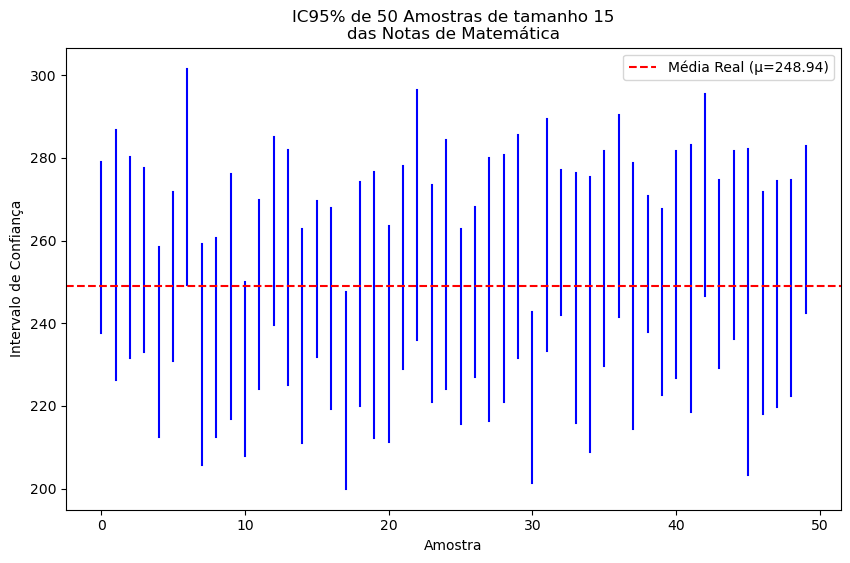

In [15]:
# Figura 1 IC95 matemática n=15
plot_ic95(ics_mat15, media_mat, titulo='IC95% de 50 Amostras de tamanho 15\n''das Notas de Matemática')

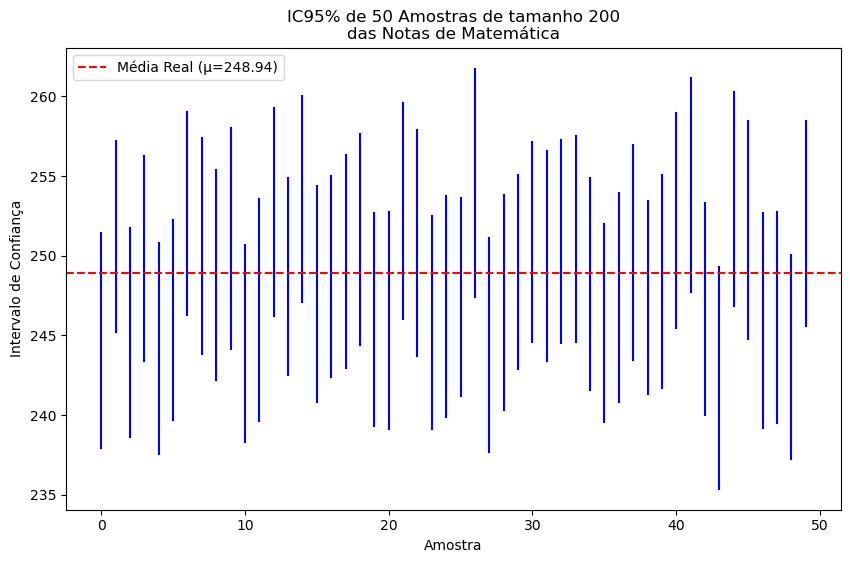

In [16]:
# Figura 2 IC95 matemática n=200
plot_ic95(ics_mat200, media_mat, titulo='IC95% de 50 Amostras de tamanho 200\n''das Notas de Matemática')

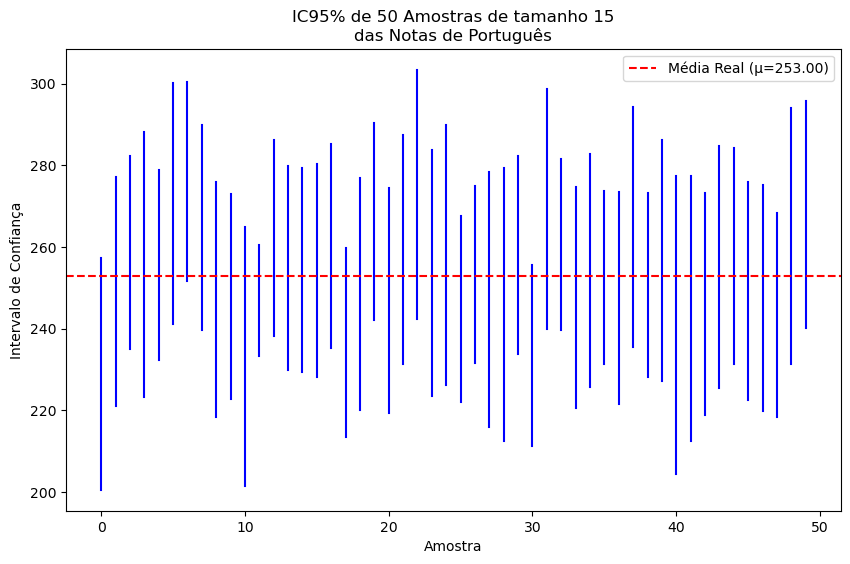

In [17]:
# Figura 3 IC95 português n=15
plot_ic95(ics_port15, media_port, titulo='IC95% de 50 Amostras de tamanho 15\n''das Notas de Português')

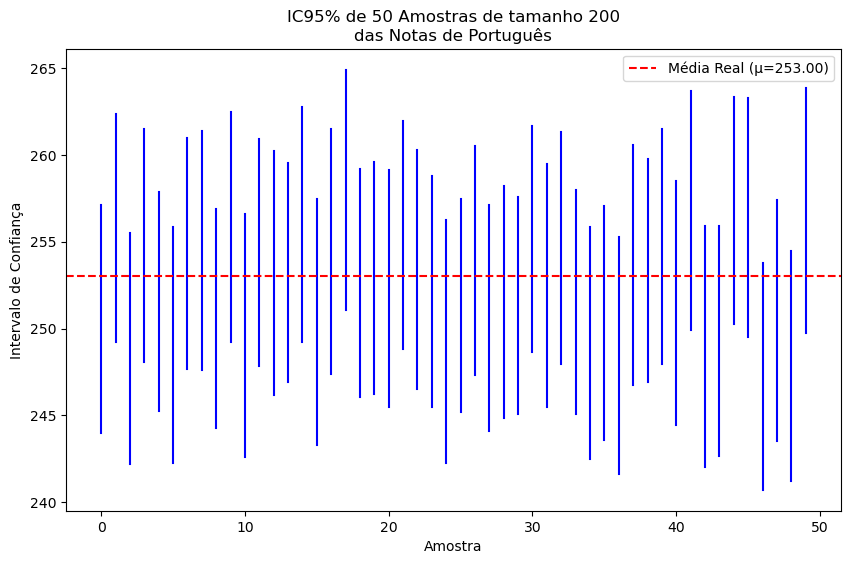

In [18]:
# Figura 3 IC95 português n=200
plot_ic95(ics_port200, media_port, titulo='IC95% de 50 Amostras de tamanho 200\n''das Notas de Português')

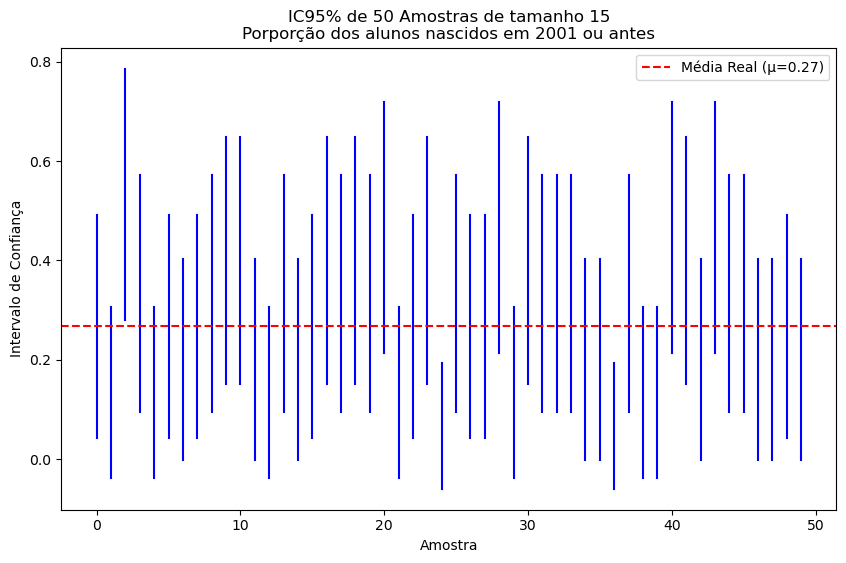

In [19]:
# Figura 5 IC95 para proporção nascidos antes de 2001 com n=15
plot_ic95(nas_01_15, antes_2001, titulo='IC95% de 50 Amostras de tamanho 15\n''Porporção dos alunos nascidos em 2001 ou antes')

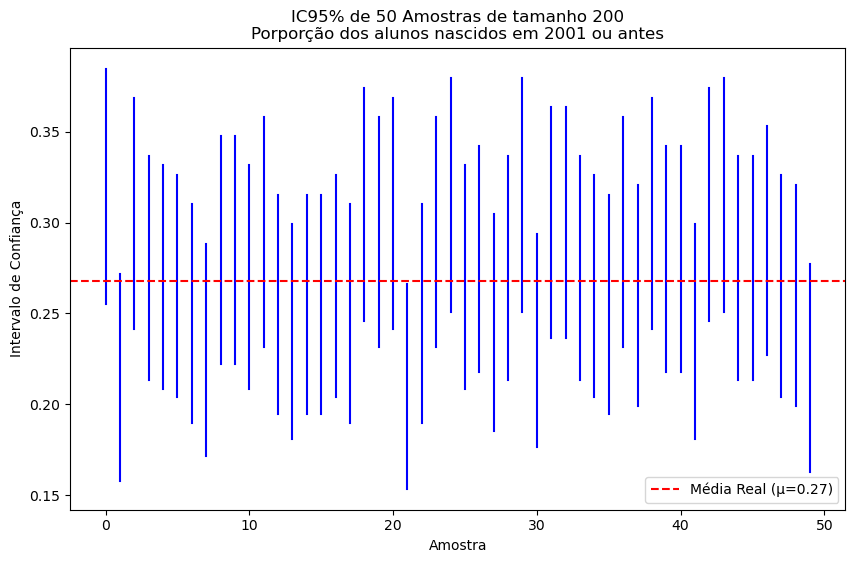

In [20]:
# Figura 6 IC95 para proporção nascidos antes de 2001 com n=200
plot_ic95(nas_01_200, antes_2001, titulo='IC95% de 50 Amostras de tamanho 200\n''Porporção dos alunos nascidos em 2001 ou antes')

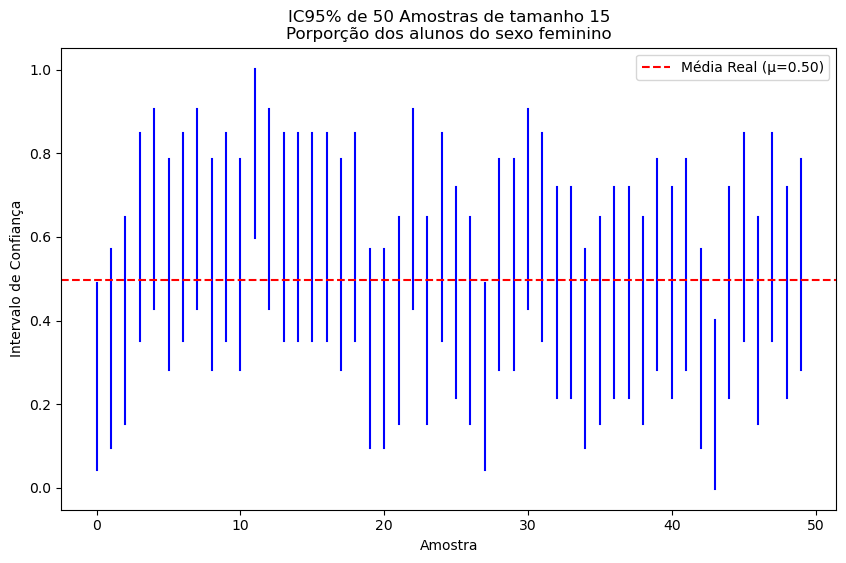

In [21]:
# Figura 7 IC95 para proporção dos alunos do sexo feminino n=15
plot_ic95(fem_15, sex_fem, titulo='IC95% de 50 Amostras de tamanho 15\n''Porporção dos alunos do sexo feminino')

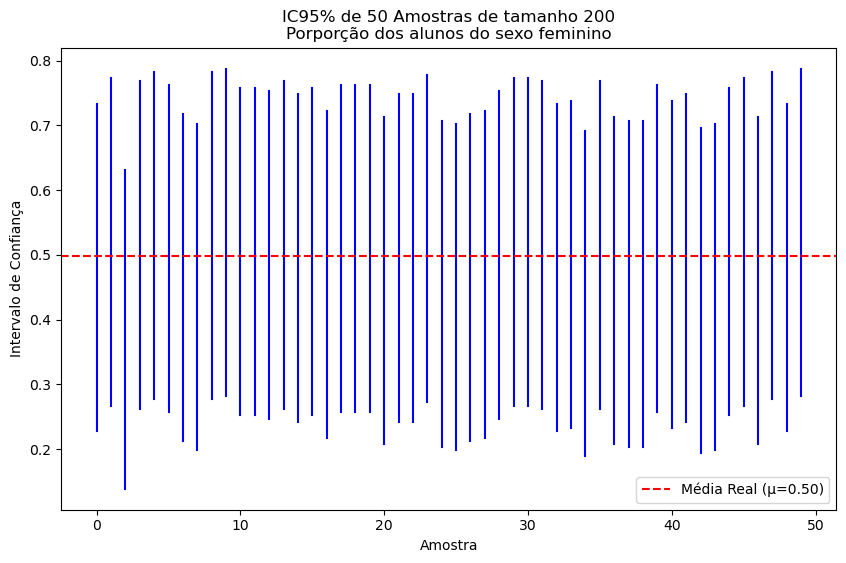

In [22]:
# Figura 8 IC95 para proporção dos alunos do sexo feminino n=200
plot_ic95(fem_200, sex_fem, titulo='IC95% de 50 Amostras de tamanho 200\n''Porporção dos alunos do sexo feminino')